## <center><h3>K-Means</h3></center>

---


## **1) K-Means — Theoretical Explanation**

K-Means is an **unsupervised clustering** algorithm that partitions data into **K groups** such that points within a group are more similar to each other than to those in other groups.

**Goal:**
Minimize the **intra-cluster variance** (how spread out points are inside each cluster).

---
**Algorithm Steps** (Lloyd's Algorithm):

1. **Initialization** — Choose K initial centroids.

   * Randomly select K points from the dataset.
   * Or use **K-Means++** for better initialization.

2. **Assignment Step** — Assign each data point to the nearest centroid.

   * "Nearest" usually means **minimum Euclidean distance**.

3. **Update Step** — Recalculate centroids as the mean of all points in each cluster.

4. **Repeat** steps 2 and 3 until:

   * Centroids don’t change significantly.
   * Or max iterations reached.

---

**Advantages:**

* Simple & fast.
* Works well when clusters are spherical and similar in size.

**Disadvantages:**

* You must choose **K** manually.
* Sensitive to outliers.
* Works poorly if clusters are non-spherical.

---








## **2) Mathematical Formulation**

We are given a dataset:

$$
X = \{x_1, x_2, \dots, x_n\}, \quad x_i \in \mathbb{R}^d
$$

where:

* $n$ = number of points
* $d$ = number of features (dimensions)

We want to partition $X$ into $K$ clusters:

$$
C = \{C_1, C_2, \dots, C_K\}
$$

such that the **objective function** (Within-Cluster Sum of Squares) is minimized:

$$
J = \sum_{k=1}^K \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

where:

* $\mu_k$ = mean (centroid) of points in cluster $C_k$

  $$
  \mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
  $$
* $\| \cdot \|$ = Euclidean norm

---

**Assignment Step Equation:**

$$
\text{Assign } x_i \text{ to } C_k \quad \text{if} \quad \|x_i - \mu_k\|^2 \leq \|x_i - \mu_j\|^2 \quad \forall j
$$

**Update Step Equation:**

$$
\mu_k^{\text{new}} = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$

---

**Complexity:**

* Time complexity: $O(n \cdot K \cdot d \cdot \text{iterations})$

---

## **3) Selecting the Number of Clusters (K)**

Since K-Means requires **K** in advance, we use:

---

### **A) Elbow Method**

* We plot **inertia** (sum of squared distances to the nearest centroid) vs. K.
* Inertia is:

$$
\text{Inertia} = \sum_{k=1}^K \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

* Choose the **"elbow"** point where inertia decreases slowly.

---

### **B) Silhouette Score**

* Measures how similar a point is to its own cluster vs. other clusters.
* Formula for each point $i$:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

where:

* $a(i)$ = average distance between $i$ and all points in its cluster
* $b(i)$ = minimum average distance between $i$ and all points in other clusters
* Range: $[-1, 1]$, higher is better.




**Basic K-Means Code + Visualization**

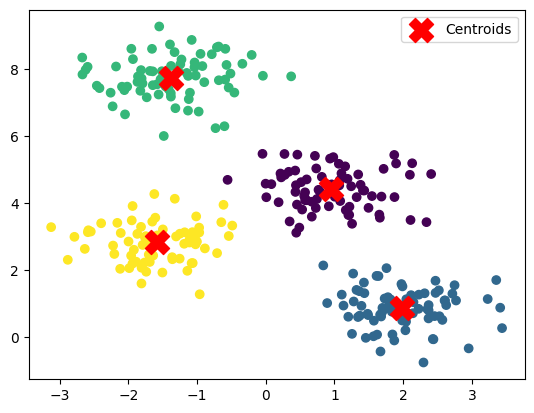

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()

**Visualization meaning:**

* Each color = one cluster.
* Red `X` = centroid.

---

## **2) Selecting the Number of Clusters (K)**

There’s no perfect formula — but two main techniques help:

1. **Elbow Method** → Find the point where adding more clusters doesn’t significantly reduce the "inertia" (within-cluster sum of squares).
2. **Silhouette Score** → Measures how well-separated and compact clusters are (ranges from -1 to 1; higher is better).

---

## **3) Elbow Method Code**

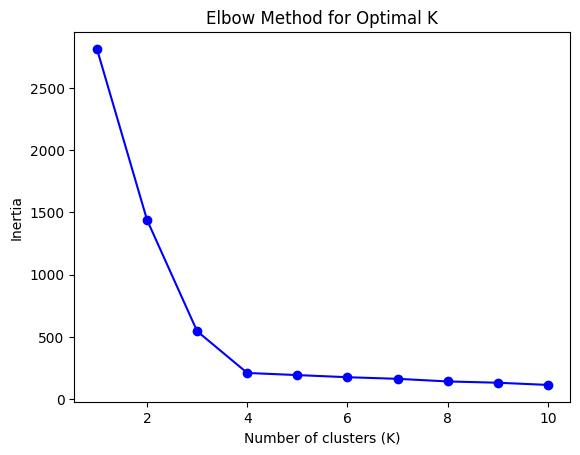

In [3]:
inertia_values = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)  # Sum of squared distances to centroids

plt.plot(K_range, inertia_values, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

**Interpretation:**

* Look for the “elbow” point where the inertia starts decreasing more slowly.

---

## **4) Silhouette Score Code**

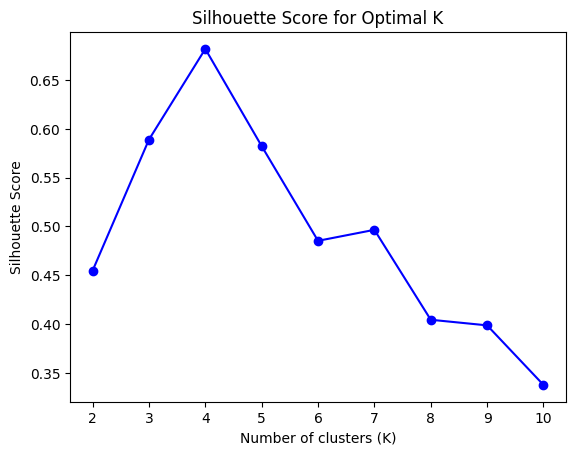

In [4]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # K=1 is invalid for silhouette
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()


**Interpretation:**

* The **best K** = the one with the highest silhouette score.

## **5) Full Kaggle Project — KMeans with Both Methods**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

In [7]:

# Select relevant features and drop any NaN values
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].dropna()

In [8]:
# Make sure df and X have the same rows (if NaNs removed)
df = df.loc[X.index].reset_index(drop=True)
X = X.reset_index(drop=True)

# -----------------------------
# 1) Elbow Method
# -----------------------------

In [9]:
inertia_values = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

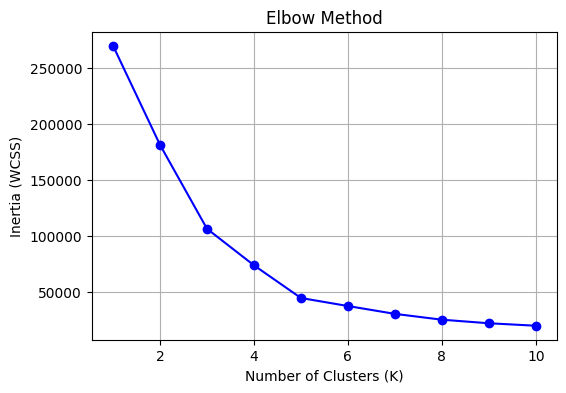

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# -----------------------------
# 2) Silhouette Score
# -----------------------------

In [11]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

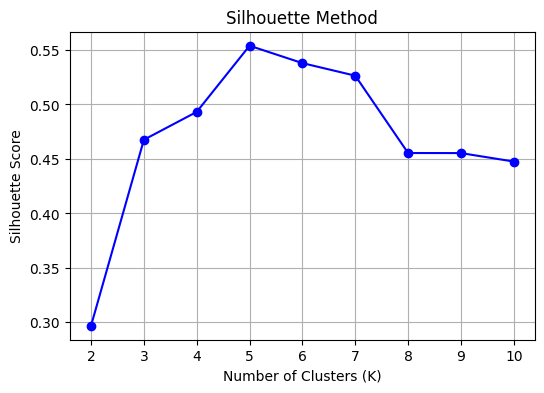

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

# -----------------------------
# 3) Apply KMeans with chosen K (Example: K=5)
# -----------------------------

In [13]:
best_k = 5  
kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# -----------------------------
# 4) Visualization
# -----------------------------

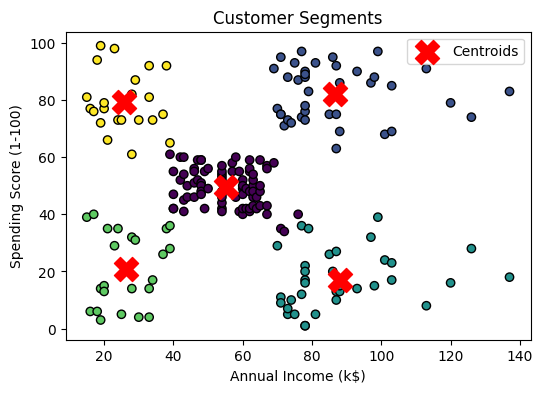

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()

---
---
### 5) Interpretation
---
---
### Cluster 0: High income, high spending
### Cluster 1: Low income, low spending
### Cluster 2: High income, low spending
### Cluster 3: Low income, high spending
### Cluster 4: Medium income, medium spending

---
---

## <center>***apply kmeans cluster on an image to segment it into parts***</center>

---
---

## **1. Theory**

**Image segmentation** with KMeans treats **each pixel** as a data point in a feature space (e.g., RGB values, maybe with coordinates).
The goal: group similar pixels together so each cluster represents a distinct segment of the image.

* **Feature vector for each pixel:**

  $$
  \mathbf{x}_i = [R_i, G_i, B_i]
  $$

  where $R_i, G_i, B_i$ are the red, green, blue intensities (0–255).

* **KMeans Objective Function:**
  Minimize:

  $$
  J = \sum_{k=1}^{K} \sum_{\mathbf{x}_i \in C_k} \| \mathbf{x}_i - \boldsymbol{\mu}_k \|^2
  $$

  where:

  * $K$ = number of clusters (segments).
  * $\boldsymbol{\mu}_k$ = centroid (mean RGB values) of cluster $C_k$.
  * $\| \cdot \|^2$ = squared Euclidean distance.

* **Steps**:

  1. Choose $K$ (number of segments).
  2. Initialize $\mu_k$ randomly.
  3. Assign each pixel to the nearest centroid (minimize Euclidean distance in RGB space).
  4. Update centroids as the mean of assigned pixels.
  5. Repeat until centroids converge.

---


## **2. Python Implementation**

In [15]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [16]:
image = cv2.imread("flash.png")  
if image is None:
    raise FileNotFoundError("Image not found. Check the path.")

In [17]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (200, 200)) 

In [18]:
pixels = image.reshape((-1, 3))

In [19]:
K = 2
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans.fit(pixels)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [20]:
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_pixels.reshape(image.shape).astype(np.uint8)

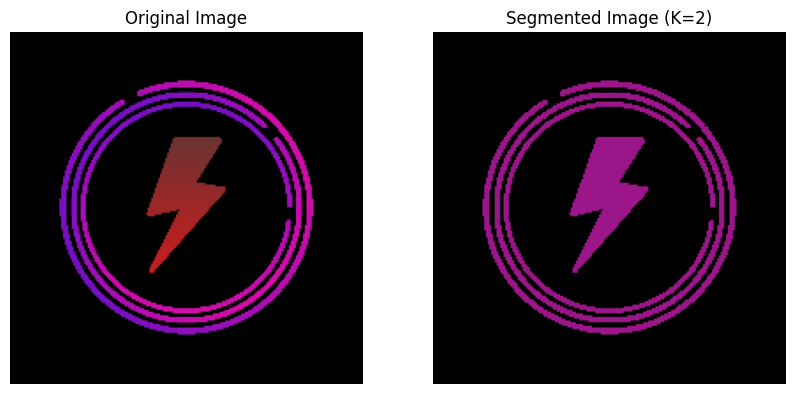

In [21]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Segmented Image (K={K})")
plt.imshow(segmented_image)
plt.axis('off')

plt.show()



| **Original Image**                                                             | **Segmented Image (KMeans)**                                                                          |
| ------------------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------------- |
| Contains **full pixel color range** and all details (textures, shades, noise). | Reduces the image to **K dominant colors** (clusters), so fine details and smooth gradients are lost. |
| Each pixel’s color is unique (up to millions possible in RGB).                 | Each pixel is replaced by the **mean color of its cluster**, so the image has only *K colors*.        |
| Realistic, natural look.                                                       | Looks more like a **posterized** or simplified image.                                                 |
| Good for human viewing.                                                        | Good for **object detection, segmentation, and simplifying data** for algorithms.                     |

### Mathematically

* **Original image**: Pixels $p_i = (R_i, G_i, B_i)$, $i = 1, 2, \dots, n$
* **KMeans segmentation**:

  * Finds **K cluster centers** $\mu_1, \mu_2, \dots, \mu_K$ in RGB space.
  * Each pixel is assigned to cluster $C_j$ such that:

    $$
    C_j = \arg \min_k \| p_i - \mu_k \|^2
    $$
  * Then replaced by $\mu_j$.

The result: image size in pixels is the same, but **color diversity is drastically reduced**.

---

## **3. Notes**

* **Choosing $K$**:
  Use the **elbow method** or **silhouette score**.
* **Adding spatial info**:
  You can include pixel coordinates $(x, y)$ in the feature vector:

  $$
  \mathbf{x}_i = [R_i, G_i, B_i, x_i, y_i]
  $$

  This preserves spatial continuity in clusters.
* **Performance**:
  For large images, sample pixels to speed up clustering, then assign the rest.

---
